#### Attribute Information :

    1) ID number >>> continuous sequence value ....
    2) Diagnosis (M = malignant, B = benign)
    3-32)

    Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

    The mean, standard error and "worst" or largest (mean of the three
    largest values) of these features were computed for each image,
    resulting in 30 features. For instance, field 3 is Mean Radius, field
    13 is Radius SE, field 23 is Worst Radius.

    All feature values are recoded with four significant digits.
    Missing attribute values: none
    Class distribution: 357 benign, 212 malignant

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Adaboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [7]:
# Load Dataset

df = pd.read_csv(r"C:\Users\pathu\Machine_Learning\ML_Projects\Breast Cancer Dataset.csv",index_col='id')
df.head() # Dimension Decrease


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df.drop(['Unnamed: 32'],axis = 1,inplace = True)

In [9]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [10]:
# Data Information / View

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [11]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [12]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Preprocessing :

    Use lable Encoder for Categorical column value into Numerical column value

In [13]:
label_encode = LabelEncoder()
label_encode # Instance Model Create >>>>> encoder

LabelEncoder()

In [14]:
df['diagnosis'] = label_encode.fit_transform(df['diagnosis'])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [15]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

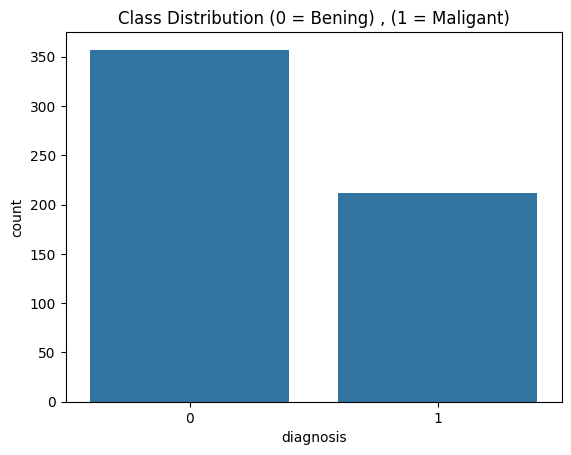

In [16]:
# Diagnosis : Class Distribution Check >>>>> Maligant , Bening

sns.countplot(data = df,x = 'diagnosis')
plt.title('Class Distribution (0 = Bening) , (1 = Maligant)')
plt.show()

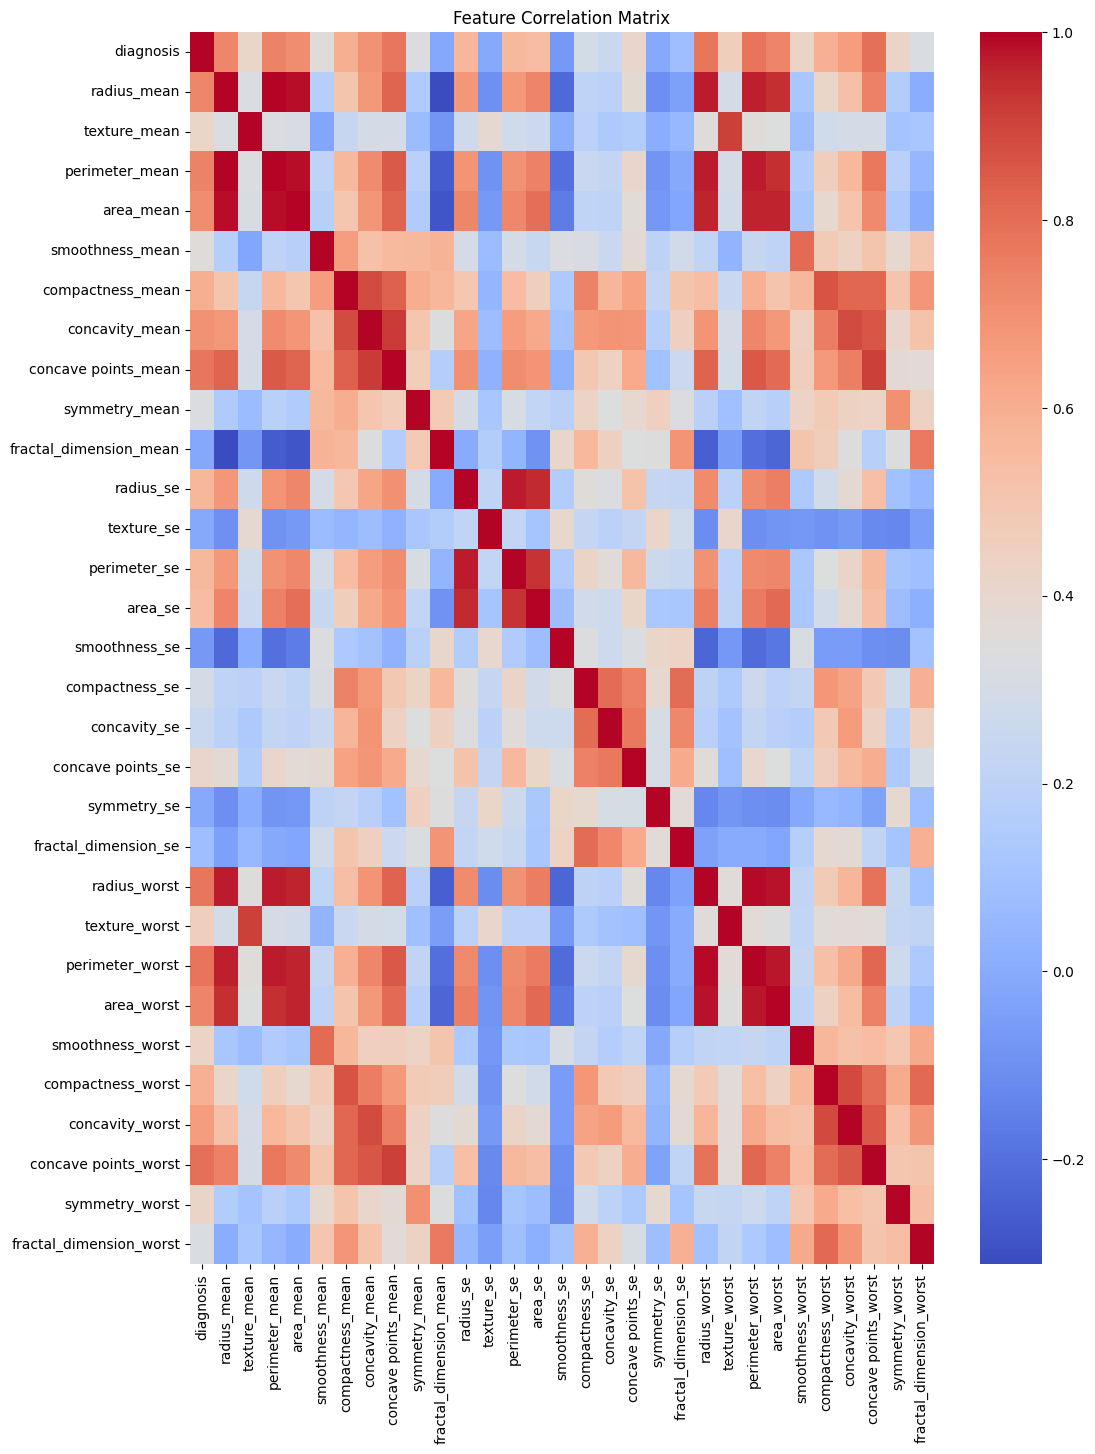

In [17]:
# Correlation Matrix

plt.figure(figsize = (12,16))
sns.heatmap(df.corr(),cmap = 'coolwarm',annot = False)
plt.title('Feature Correlation Matrix')
plt.show()

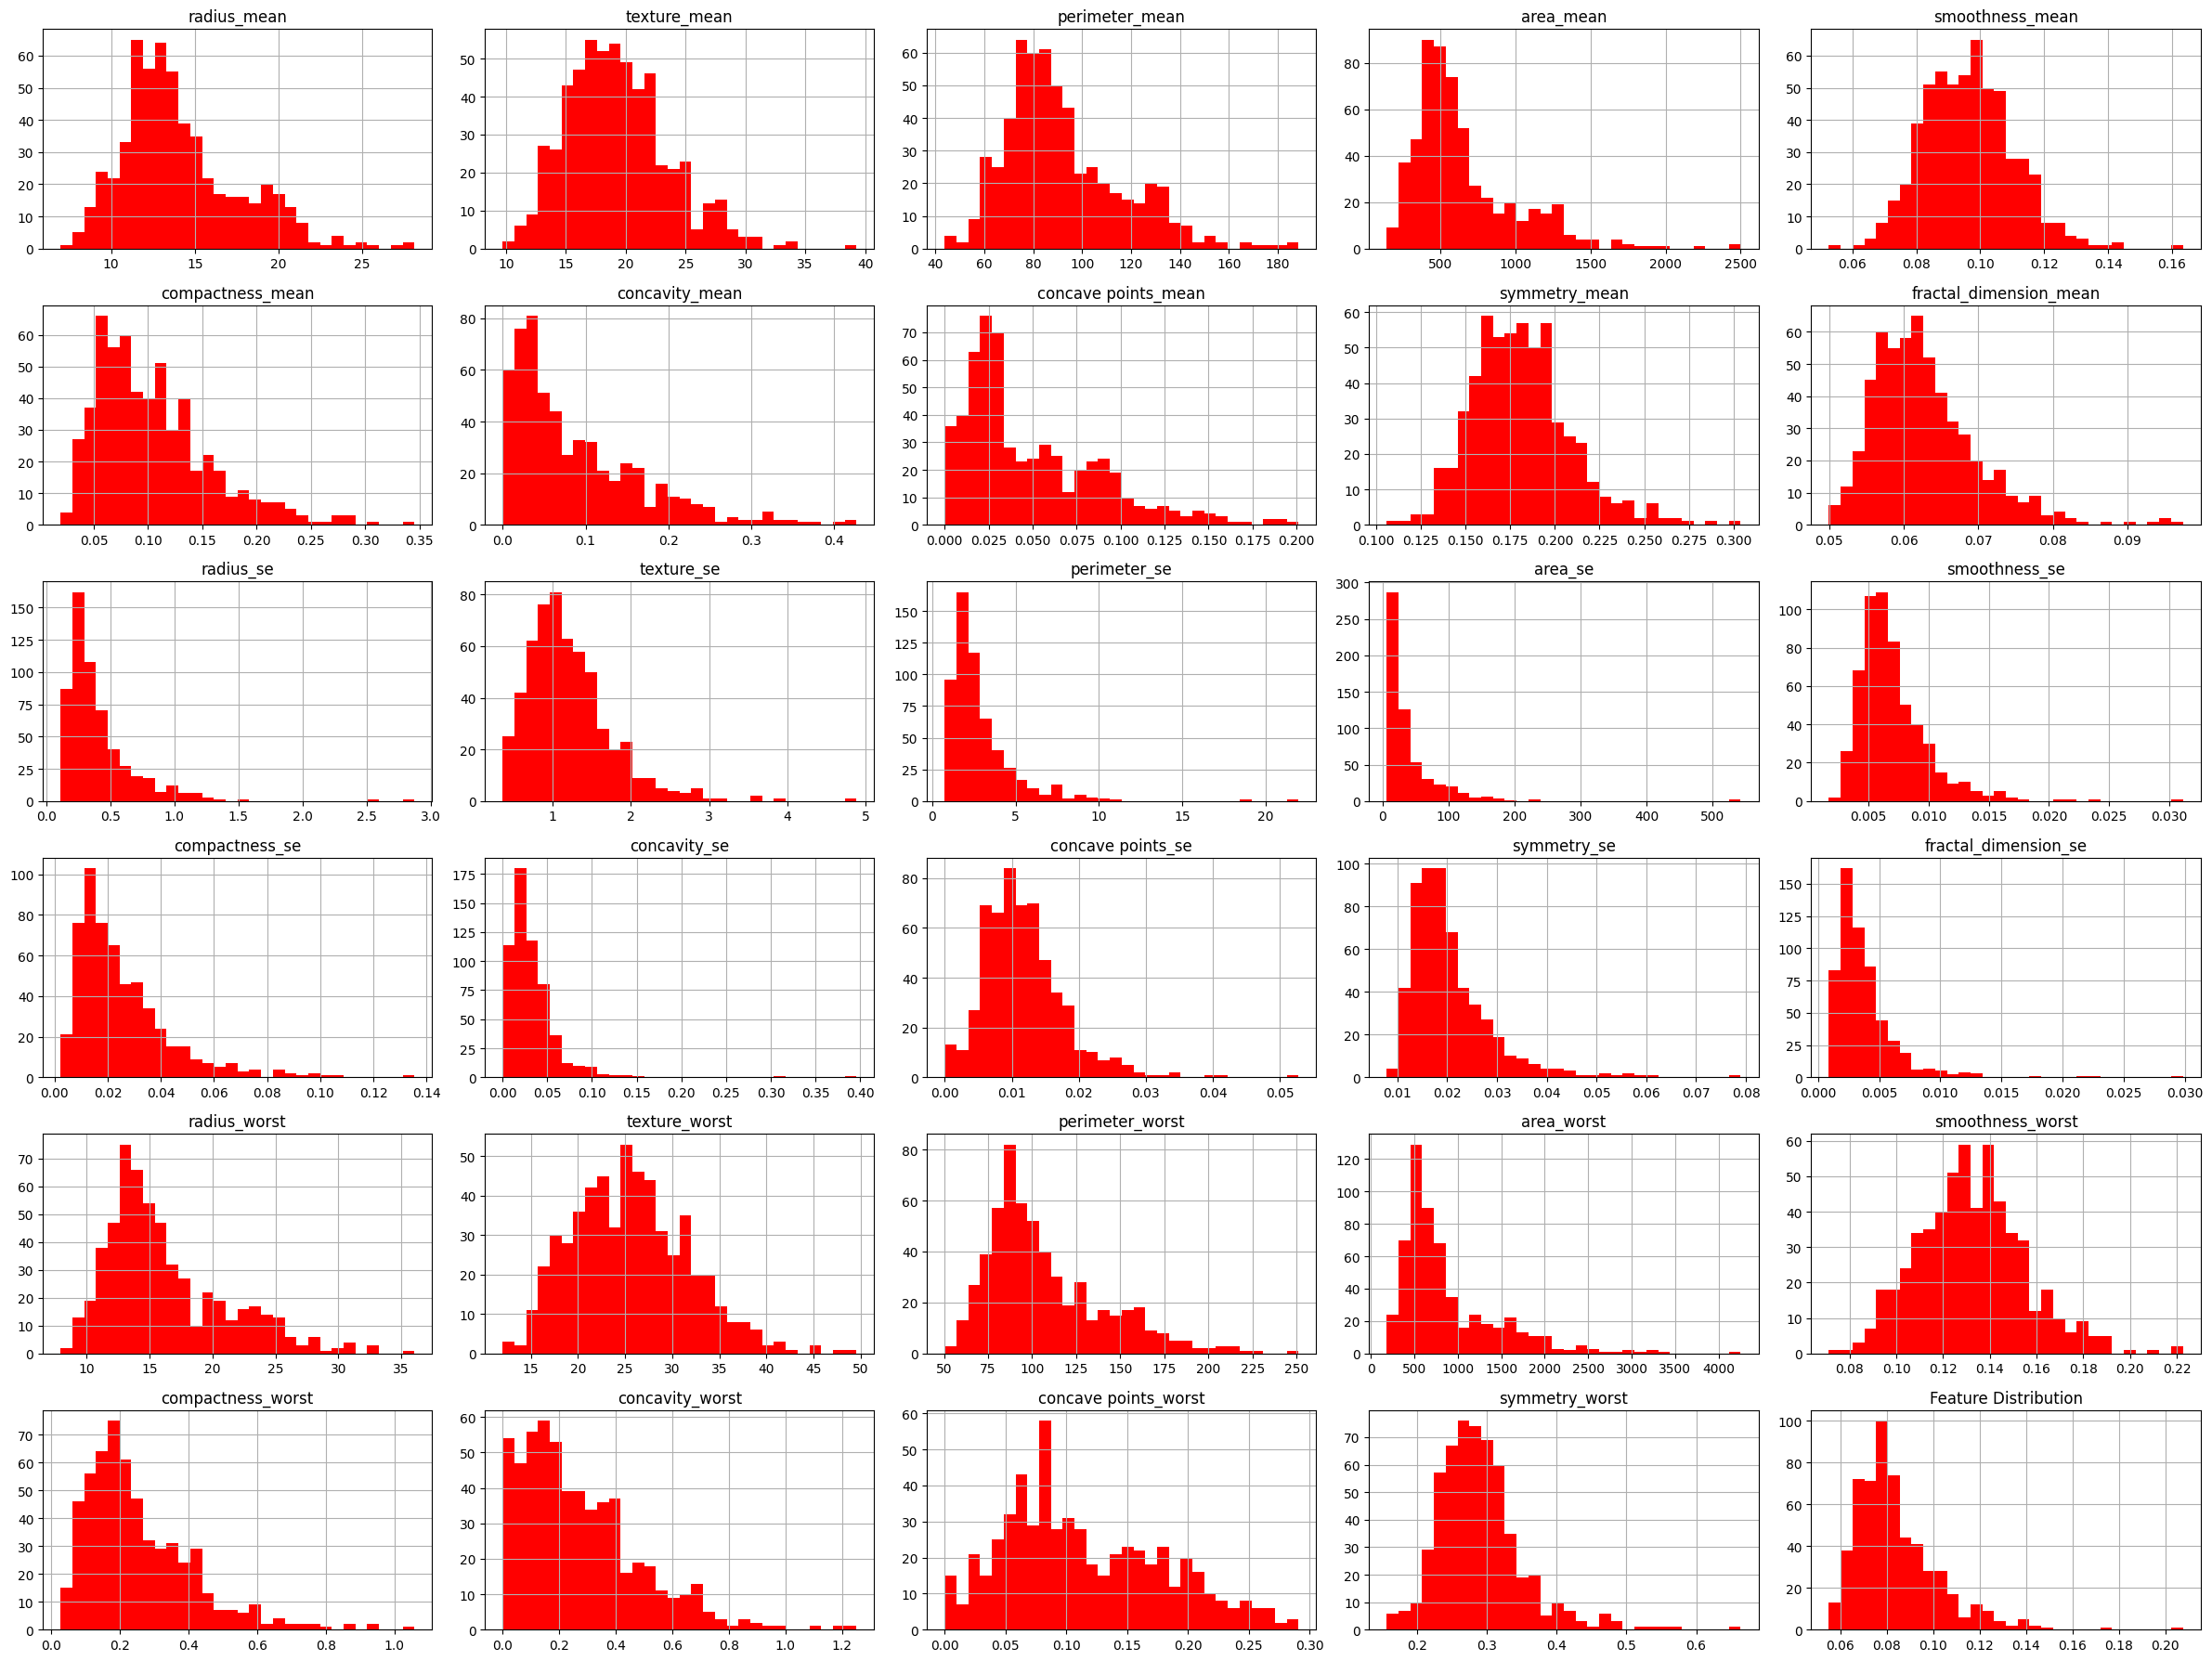

In [18]:
df.drop('diagnosis',axis =1).hist(bins = 30,figsize = (24,18),color = 'red')
plt.title('Feature Distribution')
plt.tight_layout()
plt.show()

In [19]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [20]:
# Seperate Feature Into Independent And Dependent Varibales

x = df.drop('diagnosis',axis = 1)
y = df['diagnosis']

In [21]:
# Train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.27,random_state = 44,stratify = y)

In [22]:
# Create An Instance Model

ada_model = AdaBoostClassifier(n_estimators = 60,learning_rate = 1.0,random_state = 44)
ada_model

,estimator,None
,n_estimators,60
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,44


In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Fit Model

ada_model.fit(x_train,y_train)

,estimator,None
,n_estimators,60
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,44


In [25]:
# Evaluation testing

y_pred_test = ada_model.predict(x_test)
print('Confusion Matrix = \n',confusion_matrix(y_test,y_pred_test))
print('Classification Report = \n',classification_report(y_test,y_pred_test))

Confusion Matrix = 
 [[96  1]
 [ 5 52]]
Classification Report = 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        97
           1       0.98      0.91      0.95        57

    accuracy                           0.96       154
   macro avg       0.97      0.95      0.96       154
weighted avg       0.96      0.96      0.96       154



In [26]:
ada_model.estimator_ # Stumps

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [27]:
# Evaluation training

y_pred_train = ada_model.predict(x_train)
print('Confusion Matrix = \n',confusion_matrix(y_train,y_pred_train))
print('Classification Report = \n',classification_report(y_train,y_pred_train))

Confusion Matrix = 
 [[260   0]
 [  0 155]]
Classification Report = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      1.00      1.00       155

    accuracy                           1.00       415
   macro avg       1.00      1.00      1.00       415
weighted avg       1.00      1.00      1.00       415



In [28]:
# Hyperparameter Tunnning :

# 1. GridSearchCV
# 2. RandomizedSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV

In [30]:
ada_model

,estimator,None
,n_estimators,60
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,44


In [31]:
param_grid = {
    'n_estimators' : [50, 100, 150, 200],
    'learning_rate' : [0.01, 0.05, 0.1, 0.5]
}

In [32]:
# 2. RandomizedSearchCv

random_search = RandomizedSearchCV(
    estimator = ada_model,
    param_distributions = param_grid,
    n_iter = 20,
    scoring='accuracy',
    cv = 5,
    n_jobs = 1
)

In [33]:
# Fit Model

random_search.fit(x_train,y_train)

,estimator,AdaBoostClass...ndom_state=44)
,param_distributions,"{'learning_rate': [0.01, 0.05, ...], 'n_estimators': [50, 100, ...]}"
,n_iter,20
,scoring,'accuracy'
,n_jobs,1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


#### Best Parameter And Evaluation

In [34]:
print('Best parameter : \n', random_search.best_params_)

Best parameter : 
 {'n_estimators': 200, 'learning_rate': 0.5}


In [35]:
y_pred_test = random_search.predict(x_test)
print('Classification Report : \n', classification_report(y_test, y_pred_test))

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        97
           1       0.98      0.88      0.93        57

    accuracy                           0.95       154
   macro avg       0.96      0.93      0.94       154
weighted avg       0.95      0.95      0.95       154



In [36]:
y_pred_train = random_search.predict(x_train)
print('Classification Report : \n', classification_report(y_train, y_pred_train))

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      1.00      1.00       155

    accuracy                           1.00       415
   macro avg       1.00      1.00      1.00       415
weighted avg       1.00      1.00      1.00       415



#### Best Fit Model

    Training Accuracy :: 100%
    And Testing Accuracy :: 95%